In [435]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [436]:
df=pd.read_csv("Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [438]:
df=df.astype({'X1 transaction date':str})

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    object 
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 26.0+ KB


In [440]:
df['X1 transaction date']=df['X1 transaction date'].str[:4]

In [441]:
df = df.rename({'X1 transaction date':'X1 transaction year'},axis=1)

In [442]:
df.drop(columns=['No'],inplace=True)

In [443]:
df=df.astype({'X1 transaction year':int})

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction year                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [445]:
x=df.drop(columns='Y house price of unit area')
y=df['Y house price of unit area']

In [446]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [447]:
model=LinearRegression()

In [448]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [449]:
model.intercept_

np.float64(-7283.422928848023)

In [450]:
model.coef_

array([ 2.64305154e+00, -2.76112162e-01, -4.60949094e-03,  1.11672009e+00,
        2.38195964e+02, -3.24228832e+01])

In [451]:
ypred=model.predict(x_test)

In [452]:
y_test-ypred

358    -3.469356
350    -0.415808
373     6.782105
399    -2.211762
369    -5.653993
         ...    
31    -15.813547
283    -9.165257
157    -7.060451
203     1.931973
208    -2.393632
Name: Y house price of unit area, Length: 83, dtype: float64

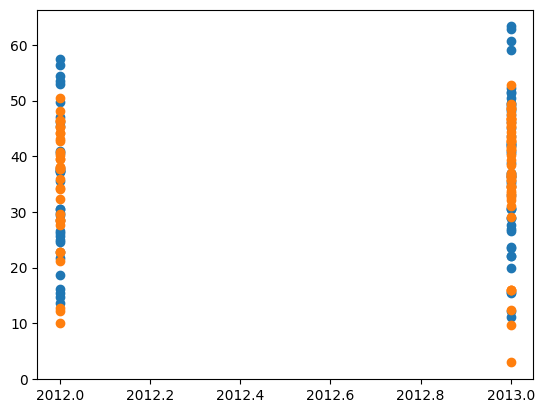

In [453]:
plt.scatter(x_test['X1 transaction year'],y_test)
plt.scatter(x_test['X1 transaction year'],ypred)

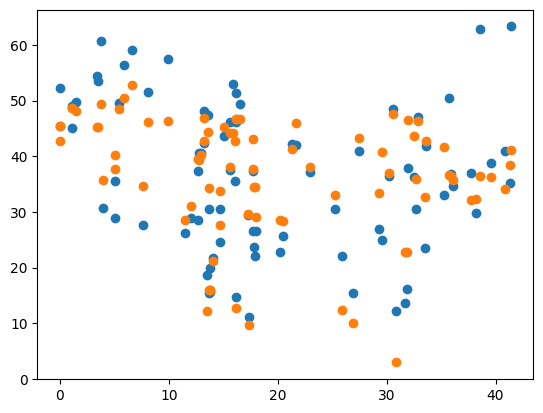

In [454]:
plt.scatter(x_test['X2 house age'],y_test)
plt.scatter(x_test['X2 house age'],ypred)

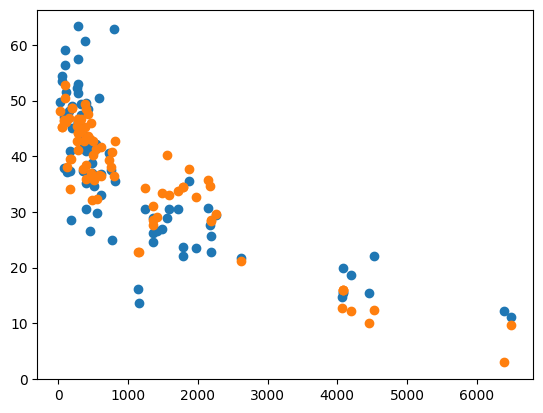

In [455]:
plt.scatter(x_test['X3 distance to the nearest MRT station'],y_test)
plt.scatter(x_test['X3 distance to the nearest MRT station'],ypred)

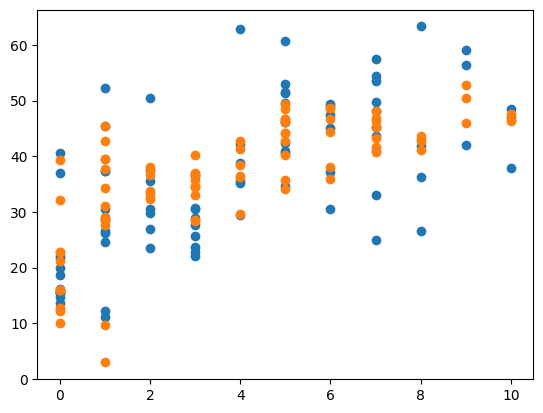

In [456]:
plt.scatter(x_test['X4 number of convenience stores'],y_test)
plt.scatter(x_test['X4 number of convenience stores'],ypred)

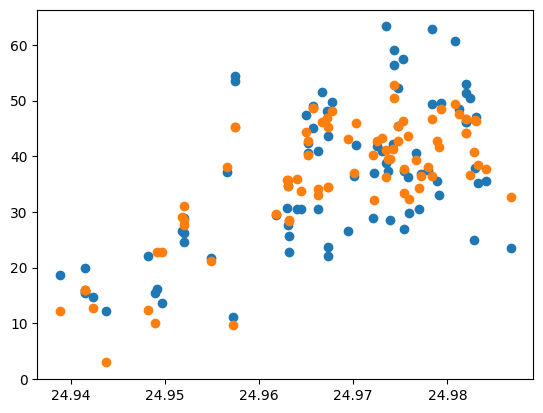

In [457]:
plt.scatter(x_test['X5 latitude'],y_test)
plt.scatter(x_test['X5 latitude'],ypred)

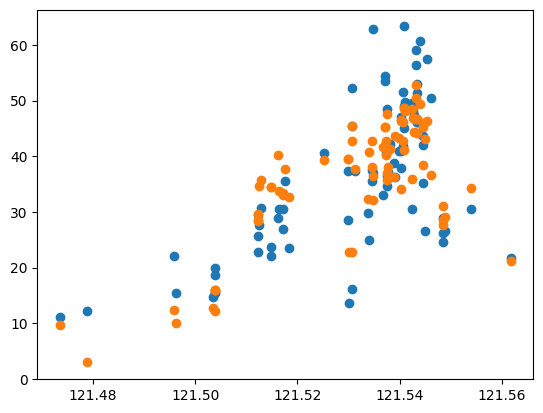

In [458]:
plt.scatter(x_test['X6 longitude'],y_test)
plt.scatter(x_test['X6 longitude'],ypred)

In [459]:
r2_score(y_test,ypred)

0.6952704730978682

In [460]:
model.score(x_test,y_test)

0.6952704730978682

In [461]:
mean_squared_error(y_test,ypred)

51.121347580878194

In [462]:
mean_absolute_error(y_test,ypred)

5.133446355383786

In [463]:
poly=PolynomialFeatures(degree=2)

In [464]:
xpoly=poly.fit_transform(x_train)
model.fit(xpoly,y_train)
xpoly_test=poly.transform(x_test)

In [465]:
model.intercept_

np.float64(-1976.772776340767)

In [466]:
model.coef_

array([ 5.31692585e+00,  4.56331167e-01,  4.77547156e+02,  8.21370979e+00,
        4.85803337e+03,  7.40932637e+04, -1.55236726e+04, -1.00220629e+00,
        7.88170735e-02, -1.17847341e-03, -2.71618531e-01, -1.74965095e+01,
        3.68136783e+01,  1.94695161e-02,  3.38269301e-05,  8.22216040e-03,
       -5.03801642e+00, -4.20841116e+00,  3.07188292e-07, -1.01486703e-03,
       -2.81409400e-01,  9.68694863e-03,  3.43544180e-02, -1.15264021e+02,
       -1.17847555e+01,  6.75712722e+03, -3.08705327e+03,  7.63035329e+01])

In [467]:
y_poly_pred=model.predict(xpoly_test)

In [468]:
y_poly_pred

array([53.47383237, 39.71610183, 55.53170612, 41.19391484, 20.33465515,
       42.4355797 , 44.06757304, 47.41705858, 14.96212206, 55.32797703,
       26.679685  , 27.83036707, 38.31472824, 15.149673  , 39.92815688,
       26.04368047, 43.35367947, 51.02280446, 20.75113004, 42.71758673,
       27.42896262, 25.65973771, 51.83383564, 42.61467762, 22.05070339,
       41.21805515, 19.7950602 , 52.53401725, 38.77250101, 46.80177124,
       19.07916149, 35.12258873, 34.97765261, 22.28927653, 44.9829966 ,
       38.68108413, 53.91178369, 19.94570216, 42.48058647, 48.03200776,
       43.04430803, 38.94888022, 45.42200552, 37.64488093, 36.71504437,
       45.68970001, 39.02485766, 18.71426715, 55.20245844, 45.48786041,
       53.47383237, 54.11680994, 40.58560844, 41.27567445, 36.84870961,
       19.93425116, 38.4009193 , 32.60331396, 20.29834715, 47.41705858,
       25.4187387 , 31.49024445, 19.93425116, 19.43236639,  7.81897681,
       25.67816153, 19.64618395, 41.73292096, 36.3080681 , 24.80

In [469]:
y_test-y_poly_pred

358   -8.373832
350    2.583898
373   -3.331706
399   -3.893915
369    2.465345
         ...   
31    -9.564248
283   -8.642426
157   -3.943153
203    1.860371
208    4.815979
Name: Y house price of unit area, Length: 83, dtype: float64

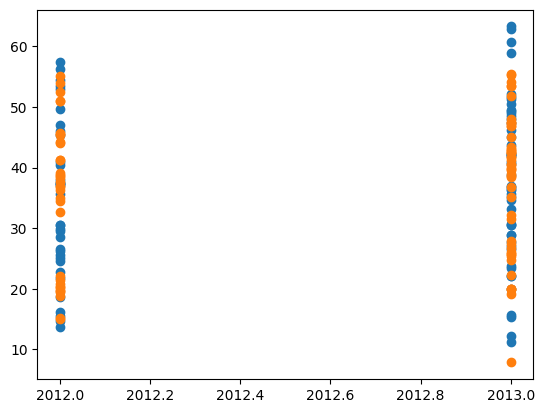

In [470]:
plt.scatter(xpoly_test[:,1],y_test)
plt.scatter(xpoly_test[:,1],y_poly_pred)

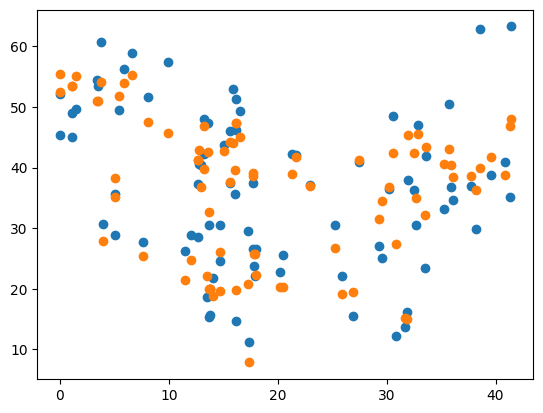

In [471]:
plt.scatter(xpoly_test[:,2],y_test)
plt.scatter(xpoly_test[:,2],y_poly_pred)

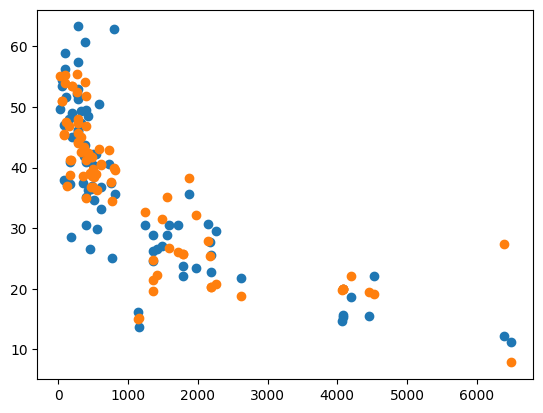

In [472]:
plt.scatter(xpoly_test[:,3],y_test)
plt.scatter(xpoly_test[:,3],y_poly_pred)

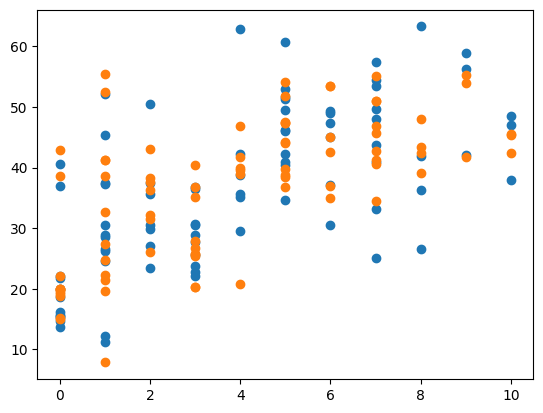

In [473]:
plt.scatter(xpoly_test[:,4],y_test)
plt.scatter(xpoly_test[:,4],y_poly_pred)

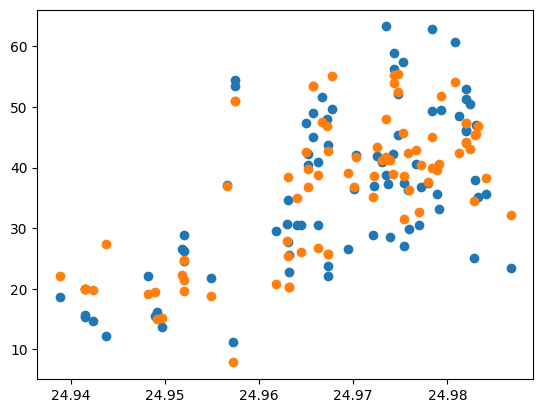

In [474]:
plt.scatter(xpoly_test[:,5],y_test)
plt.scatter(xpoly_test[:,5],y_poly_pred)